In [1]:
# Import the necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# For text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# For creating a pipeline
from sklearn.pipeline import Pipeline

In [4]:
# Classifier Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

In [5]:
# Read the File
data = pd.read_csv('training.csv')

In [6]:
data.describe()

,index,strength
count,669424.000000,669424.000000
mean,334837.506352,0.990217
std,193311.729046,0.507937
min,0.000000,0.000000
25%,167423.750000,1.000000
50%,334840.500000,1.000000
75%,502254.250000,1.000000
max,669639.000000,2.000000


In [7]:
data.head()

,index,password,strength
0,0,kzde5577,1
1,1,kino3434,1
2,2,visi7k1yr,1
3,3,megzy123,1
4,4,lamborghin1,1


In [8]:
# Features which are passwords
# Selecting all rows and coloumn 1 which are passwords of type 'string'.

features = data.values[:, 1].astype('str')

In [9]:
print(features)

['kzde5577' 'kino3434' 'visi7k1yr' ... '184520socram' 'marken22a'
 'fxx4pw4g']


In [10]:
# Labels which are strength of password
# Selecting all rows and last coloumn which are passwords strengths of type 'int'.

labels = data.values[:, -1].astype('int')

In [11]:
print(labels)

[1 1 1 ... 1 1 1]


In [12]:
# Sequentially apply a list of transforms and a final estimator
classifier_model = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char')),
                ('logisticRegression',LogisticRegression(multi_class='multinomial', solver='sag')),
])

In [13]:
# Fit the Model
classifier_model.fit(features, labels)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char')),
                ('logisticRegression',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [14]:
# Instead of splitting dataset into training and testing, we keep test dataset as seprate .csv file 

In [15]:
df= pd.read_csv('cleanpasswordlist.csv')
X = df.values[:, 1].astype('str')
y = df.values[:, -1].astype('int')

In [16]:
print('Testing Accuracy: ',classifier_model.score(X, y)*100)

Testing Accuracy:  81.94495275796393


In [17]:
predictions = classifier_model.predict(X)

In [18]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y,predictions)) #first parameter x, second is y


[[ 26855  62745     62]
 [ 19272 464418  12960]
 [   148  25678  57287]]


In [19]:
# Print a classification report
print(metrics.classification_report(y,predictions))


              precision    recall  f1-score   support

           0       0.58      0.30      0.40     89662
           1       0.84      0.94      0.89    496650
           2       0.81      0.69      0.75     83113

    accuracy                           0.82    669425
   macro avg       0.75      0.64      0.68    669425
weighted avg       0.80      0.82      0.80    669425



In [20]:
#showing predication for 50 passwords as a sample
list=X[70:120]
predict=classifier_model.predict(list)


In [21]:
print(list)

['mickael12' 'cesarmaio1' 'juliana19' 'kunyukbabi69' 'hodygid757'
 'ga98SIzk0NwhiZaE' '283671gus' 'jalingo1' 'p2share' 'k9b8cz6aj2' 'gill02'
 'j09000' '2021848709.' 'hayhayq2' 'yllime123' '3vszncp4' '123477889a'
 '12345yolanda' 'woon12' '929865yt' 'jonothepoop1' '838188linh'
 'kVczcljg4OA25Aeb' 'k1k2k3k4k5k6' 'poseidon2011' 's4m2dx9e6' 'xiau5ff'
 'ns2b0727' 'mmm23mm' 'gkrqjs6' 'ikanez886' '746xitEGiqObog'
 'oekojWyH120063' 'RqsuUsDYxNgr8T40' 'xyws951753' 'elonex24' 'jalal123456'
 '6tequila6' 'yu4cmn' 'ass359' 'icap12' '2akira2' 'znbl5tj1' '123maxbala'
 '64959rodro' 'moken7' 'teemteem97' 'aquhih220' 'zoobike04' 'farrukhcse12']


In [22]:
print(predict)

[1 1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 2 0 1 1 0 1 0 1 1 1 1 2 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1]


In [23]:
# Taking sample of 50 passwords for ploting on Graph

x=features[100:150]
y=classifier_model.predict(x)

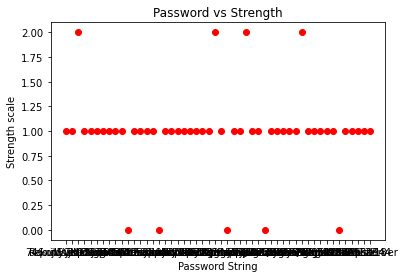

In [24]:
# Ploting graph

plt.scatter(x, y, color = 'red')

plt.title('Password vs Strength')
plt.xlabel('Password String')
plt.ylabel('Strength scale')
plt.show()

In [25]:
# Printing x coordinate
print(x)

['746xitEGiqObog' 'oekojWyH120063' 'RqsuUsDYxNgr8T40' 'xyws951753'
 'elonex24' 'jalal123456' '6tequila6' 'yu4cmn' 'ass359' 'icap12' '2akira2'
 'znbl5tj1' '123maxbala' '64959rodro' 'moken7' 'teemteem97' 'aquhih220'
 'zoobike04' 'farrukhcse12' 'pato221182' '10Erjrlmebup0n' 'pikey231'
 'z3ro1sm' 'portales1' 'jUV4dSDQwNwPpA36' 'fnmsdha476' 'g3rappa'
 'rogyh820' 'sanki1' '20Dgw7TQ0OQVdly7' 'ldteugao6' '2yz4ewwg'
 'www32223222' 'yuri110995' '1972vishara' 'warriors08' 'vehat387'
 '3y6iwef2g6' 'RPFUOUDQwMwVW0AS' 'w9209640' '5gzj5uf' 'kinga22'
 'nicolas05' '26522876p' 'barra23' '147963asd' '123net123' 's9830950044'
 'denise18' '2010server']


In [26]:
# Printing y coordinate
print(y)

[1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 0 1 1 2 1 1 0 1 1 1 1
 1 2 1 1 1 1 1 0 1 1 1 1 1]
